In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
Colinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_test_data = pd.merge(mouse_drug_data, Colinical_trial_data, how = 'outer', on = ('Mouse ID', 'Mouse ID') ) 

# Display the data table for preview
drug_test_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = drug_test_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)

# rename the column 'Tumor Volume (mm3)' to 'Mean Tumor Volume (mm3)'
mean_tumor_volume = mean_tumor_volume.rename(columns = {'Tumor Volume (mm3)' : 'Mean Tumor Volume (mm3)'})

#reset index
mean_tumor_volume = mean_tumor_volume.reset_index()


# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = drug_n_tpoint = drug_test_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(sem_tumor_volume)

# rename the column 'Tumor Volume (mm3)' to 'Tumor Volume Sem(mm3)'
sem_tumor_volume = sem_tumor_volume.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume SEM(mm3)'})

#reset index
sem_tumor_volume = sem_tumor_volume.reset_index()

# Preview DataFrame
sem_tumor_volume.head()

,Drug,Timepoint,Tumor Volume SEM(mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# reformatting the mean tumor volume data with Timpoint as index, drug as columns
drug_MTV = pd.pivot_table(mean_tumor_volume, values = 'Mean Tumor Volume (mm3)',  index = ['Timepoint'], columns = ['Drug'])

# reformatting the tumor volume standard error data with Timpoint as index, drug as columns
drug_STV = pd.pivot_table(sem_tumor_volume, values = 'Tumor Volume SEM(mm3)',  index = ['Timepoint'], columns = ['Drug'])

# Preview that Reformatting worked
drug_MTV.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#resetting indices for the reformatted data
drug_MTV = drug_MTV.reset_index()
drug_STV = drug_STV.reset_index()


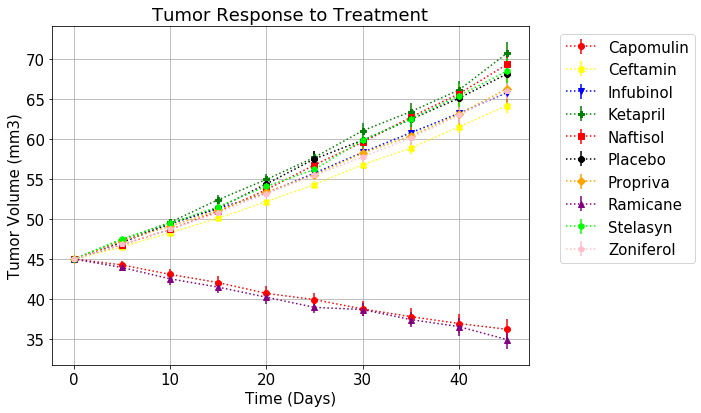

In [8]:
# set plot size
fig = plt.figure()
fig.set_size_inches((10, 6))

# lists of drugs, marker, colors
drugs = [x for x in drug_MTV.columns[1:]]
markers = ['o', 'X', 'v', 'P', 's', '8', 'D', '^', 'h', 'p' ]
colors = ['red', 'yellow', 'blue', 'green', 'red',  'black', 'orange', 'purple', 'lime',  'pink']

# Generate the Plot (with Error Bars)

rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})

for i, j , k in zip(drugs, markers, colors):
    plt.errorbar(drug_MTV['Timepoint'], drug_MTV[i], drug_STV[i], fmt = j, color = k, linestyle = ':', label = i)

# Add labels, legend, grid  
plt.grid()
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)

# Save the Figure
plt.savefig('images/Tumor_responses_to_treatment.png')

# Show the Figure
plt.show()


# Analysis: Tumor Response to Treatment
* Mice were treated with different drugs (including the placebo) for 45 days. Tumor volume (in mm3) were recored every 5 days
* The plot showed the mean  tumor volume and standard error for each group of experiment.
* The data are divided into two groups, with tumor volumes decreasing during the treatemnt in one group (treated with Capomulin or Ramicane), and tumor volumes increasing during the treatemnt in another group (treated with Ceftmin, Inbubinol, Ketapril, Naftisol, Propriva, Stelasyn, Zoniferol, or Placebo)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = drug_test_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_site = pd.DataFrame(mean_met_site)

# rename the column 'Metastatic Sites' to 'Mean Metastatic Sites'
mean_met_site = mean_met_site.rename(columns = {'Metastatic Sites' : 'Mean Metastatic Sites'})

# Preview DataFrame
mean_met_site.head()


Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site = drug_test_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_site = pd.DataFrame(sem_met_site)

# rename the column 'Metastatic Sites' to 'Mean Metastatic Sites'
sem_met_site = sem_met_site.rename(columns = {'Metastatic Sites' : 'Metastatic Sites SEM'})

# Preview DataFrame
sem_met_site.head()


Metastatic Sites SEM
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
#reset index 
mean_met_site = mean_met_site.reset_index()
sem_met_site = sem_met_site.reset_index()

# reformatting the mean metastatic site data with Timpoint as index, drug as columns
drug_MMS = pd.pivot_table(mean_met_site, values = 'Mean Metastatic Sites',  index = ['Timepoint'], columns = ['Drug'])

# reformatting the metastatic site standard error data with Timpoint as index, drug as columns
drug_SMS = pd.pivot_table(sem_met_site, values = 'Metastatic Sites SEM',  index = ['Timepoint'], columns = ['Drug'])

# Preview that Reformatting worked
drug_MMS.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
#resetting indices for the reformatted data
drug_MMS = drug_MMS.reset_index()
drug_SMS = drug_SMS.reset_index()


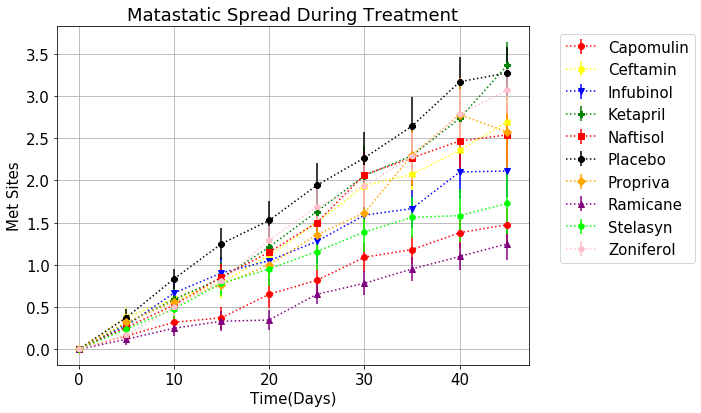

In [14]:
# set plot size
fig = plt.figure()
fig.set_size_inches((10, 6))

# Generate the Plot (with Error Bars)
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})

for i, j , k in zip(drugs, markers, colors):
    plt.errorbar(drug_MMS['Timepoint'], drug_MMS[i], drug_SMS[i], fmt = j, color = k, linestyle = ':', label = i)

# Add labels, legend, grid      
plt.grid()
plt.title('Matastatic Spread During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Met Sites')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)


# Save the Figure
plt.savefig('images/Matastatic_spread_during_treatment.png')

# Show the Figure
plt.show()


# Analysis: Metastatic Spreading During Treatment
* Mice were treated with different drugs (including the placebo) for 45 days. Number of metstatic sites was recored every 5 days
* The plot showed the mean metastatic sites and standard error for each group of experiment.
* Metastatic sites were increasing for all drug treatments. Mice treated with Capomulin and Ramicane, which were observed with total tumor volume decreasing, also had lease metastatic sites.
* Mice treated with Ketapril, which were observed with the most tumor volume increasing among all the treatments, had more metastatic sites than mice with any other treatment (including the Placebo) after 45 days.

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = drug_test_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count)

#reset index
mouse_count = mouse_count.reset_index()

# rename the column 'Metastatic Sites' to 'Mean Metastatic Sites'
mouse_count = mouse_count.rename(columns = {'Mouse ID' : 'Mouse Count'})

# Preview DataFrame
mouse_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
drug_mouse_count = pd.pivot_table(mouse_count, values = 'Mouse Count',  index = ['Timepoint'], columns = ['Drug'])

# Preview the Data Frame
drug_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [18]:
#resetting indices for the reformatted data
drug_mouse_count = drug_mouse_count.reset_index()

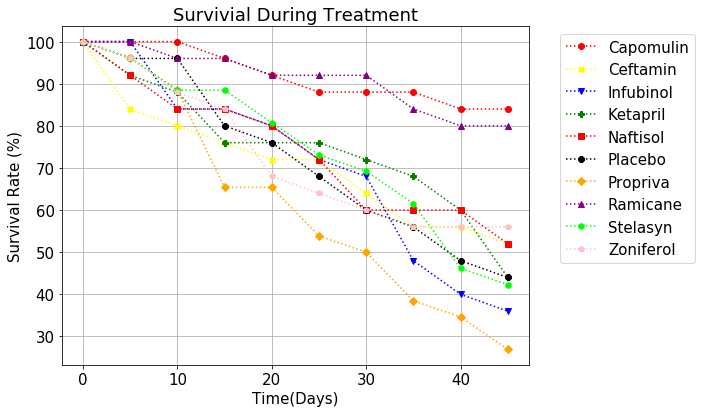

In [23]:
# set plot size
fig = plt.figure()
fig.set_size_inches((10, 6))



# Generate the Plot (Accounting for percentages)
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})

for i, j , k in zip(drugs, markers, colors):
    plt.plot(drug_mouse_count['Timepoint'], 100*(drug_mouse_count[i]/drug_mouse_count[i][0]), marker = j, color = k, linestyle = ':', label = i)


# Add labels, legend, grid
plt.grid()
plt.title('Survivial During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)

# Save the Figure
plt.savefig('images/mouse_survival_during_treatment.png')

# Show the Figure
plt.show()

# Analysis: Survival rate
* Mice were treated with different drugs (including the placebo) for 45 days. 25 mice were used at the beginning of the experiment for each treatment. 
* The plot showed the survial rate for each group of mice
* Survival rate were decreasing for all drug treatments. Mice treated with Capomulin and Ramicane had highest survival rate


## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
TV_percent_change = [100*((drug_MTV[i][9] - drug_MTV[i][0])/drug_MTV[i][0]) for i in drugs]

# Display the data to confirm
TV_percent_change_series= pd.Series(data =  TV_percent_change, index = drugs)
TV_percent_change_series

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

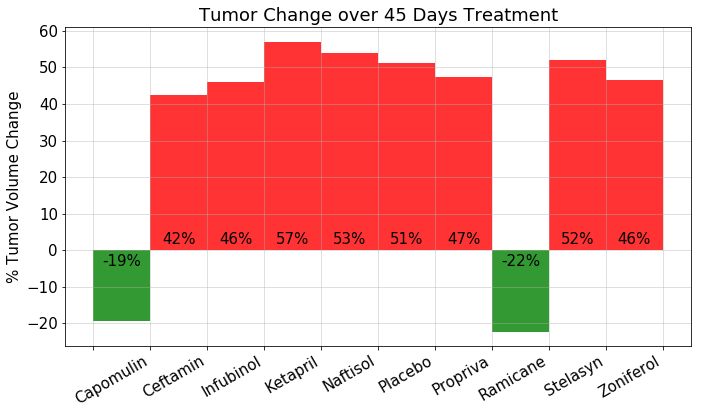

In [25]:
#index and value for drugs with increasing tumor volume during treaememt
p_index = []
p_value = []

#index and value for drugs with decreasing tumor volume during treaememt
n_index = []
n_value = []

# Store all Relevant Percent Changes 
for i in np.arange(len(TV_percent_change)):
    if TV_percent_change[i] >= 0:
        p_index.append(i)
        p_value.append(TV_percent_change[i])
    else:
        n_index.append(i)
        n_value.append(TV_percent_change[i])
        
# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))

width = 1

passing = ax.bar(n_index, n_value, width, color='g', alpha = 0.8)
failing = ax.bar(p_index, p_value, width, color='r', alpha = 0.8)


# Orient widths. Add labels, tick marks, etc. 

rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})

plt.title('Tumor Change over 45 Days Treatment')
plt.ylabel('% Tumor Volume Change')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#making grids
drug_xticks = np.arange(-0.5, 10.5, 1)
ax.set_xticks(drug_xticks)
ax.grid(which='major', alpha=0.5)

# labeling bars
drugs1 = [" "] + drugs
plt.xticks(drug_xticks, drugs1)

fig.tight_layout()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        if rect.get_height() >0:
            height = 5
            ax.text(rect.get_x() + rect.get_width()/2., height, f'{int(rect.get_height())}%', ha='center', va='top')
        else:
            height = -5
            ax.text(rect.get_x() + rect.get_width()/2., height, f'{int(rect.get_height())}%', ha='center', va='bottom')
            
# Call functions to implement the function calls
autolabel(passing)
autolabel(failing)
    
# Save the Figure
plt.savefig('images/Tumor_change_during_treatment.png')

# Show the Figure
plt.show()

# Analysis: Tumor volume change 
* Mice were treated with different drugs (including the placebo) for 45 days. 
* The bar plot showed the tumor volume change in percentage for each treatment
* Tumor Volume was decreading in mice treated with Capomulin or Ramicane, and increasing in mice treated with Ceftmin, Inbubinol, Ketapril, Naftisol, Propriva, Stelasyn, Zoniferol, or Placebo 
